# 라이브러리 설치

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 시각화 준비

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.4 MB/s eta 0:00:00


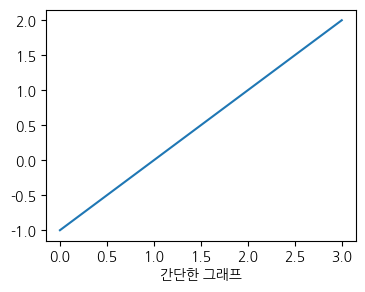

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [65]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝트/파이널프로젝트/데이터 모음/전처리 1차/2022년 물류+허브+구당 인구비+소득_수정.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9094 entries, 0 to 9093
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   배송년월일         9094 non-null   object 
 1   년             9094 non-null   int64  
 2   월             9094 non-null   int64  
 3   일             9094 non-null   int64  
 4   요일            9094 non-null   object 
 5   공휴일           9094 non-null   int64  
 6   담당지역          9094 non-null   object 
 7   터미널이름         9094 non-null   object 
 8   가구/인테리어       9094 non-null   float64
 9   기타            9094 non-null   float64
 10  도서/음반         9094 non-null   float64
 11  디지털/가전        9094 non-null   float64
 12  생활/건강         9094 non-null   float64
 13  스포츠/레저        9094 non-null   float64
 14  식품            9094 non-null   float64
 15  출산/육아         9094 non-null   float64
 16  패션의류          9094 non-null   float64
 17  패션잡화          9094 non-null   float64
 18  화장품/미용        9094 non-null 

In [66]:
df.columns

Index(['배송년월일', '년', '월', '일', '요일', '공휴일', '담당지역', '터미널이름', '가구/인테리어', '기타',
       '도서/음반', '디지털/가전', '생활/건강', '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화',
       '화장품/미용', '총 인구', '20대 미만 비율', '20-30대 비율', '40-50대 비율', '60-70대 비율',
       '80대 이상 비율', '소득2천만원주민비율', '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율',
       '소득6천만원주민비율', '소득7천만원주민비율', '소득7천만원이상주민비율'],
      dtype='object')

# 데이터 전처리하기

## 지역별 품목별 택배물량 합

In [67]:
region = df[['담당지역', '터미널이름', '가구/인테리어', '기타', '도서/음반', '디지털/가전', '생활/건강', '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화', '화장품/미용']]
region = region.groupby(['담당지역', '터미널이름']).sum().reset_index()
region['총 물량'] = region.iloc[:, 2:].sum(axis=1)
region.sort_values(by='총 물량', ascending=False)

,담당지역,터미널이름,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총 물량
0,강남구,강남ASub & 강남BSub,275242.0,2525106.0,595718.0,721765.0,1341723.0,185921.0,1290945.0,147049.0,3028440.0,1034021.0,1074890.0,12220820.0
3,강서구,강서ASub & 강서BSub,182715.0,1562369.0,326254.0,692447.0,977790.0,184530.0,1073682.0,168926.0,1751693.0,700831.0,806913.0,8428150.0
12,마포구,마포Sub,155868.0,1722815.0,364853.0,831976.0,1048552.0,123992.0,965731.0,104235.0,1458106.0,612734.0,427784.0,7816646.0
17,송파구,송파C Sub,136375.0,1568109.0,276397.0,530131.0,926452.0,197337.0,892543.0,117314.0,1724478.0,638712.0,507565.0,7515413.0
16,성북구,성북ASub & 성북BSub,111893.0,1403876.0,170315.0,356459.0,724991.0,106971.0,659793.0,175804.0,2453964.0,886944.0,445436.0,7496446.0
15,성동구,성동ASub & 성동BSub,138045.0,1882368.0,276955.0,476059.0,588104.0,106779.0,535848.0,77660.0,2078295.0,783211.0,330666.0,7273990.0
7,금천구,금천Sub,175520.0,1106367.0,192779.0,558107.0,680519.0,224557.0,616589.0,155519.0,1551027.0,706171.0,744838.0,6711993.0
14,서초구,서초ASub & 서초BSub,160972.0,1545277.0,406367.0,441927.0,789495.0,120380.0,878761.0,93052.0,1181633.0,439304.0,455652.0,6512820.0
19,영등포구,영등포Sub,119114.0,1450337.0,273124.0,545846.0,691994.0,97854.0,823978.0,96820.0,1096614.0,465495.0,419653.0,6080829.0
20,용산구,용산Sub,75742.0,1036766.0,164546.0,1890409.0,482472.0,80805.0,379255.0,47115.0,786546.0,314815.0,185056.0,5443527.0


## 지역별 소득수준별 택배 물량 평균

In [68]:
income = df[['담당지역', '소득2천만원주민비율', '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율', '소득6천만원주민비율', '소득7천만원주민비율', '소득7천만원이상주민비율']]
income = income.groupby(['담당지역']).mean().reset_index()
income.sort_values(by='소득7천만원이상주민비율', ascending=False)

,담당지역,소득2천만원주민비율,소득3천만원주민비율,소득4천만원주민비율,소득5천만원주민비율,소득6천만원주민비율,소득7천만원주민비율,소득7천만원이상주민비율
0,강남구,0.09,0.28,0.21,0.13,0.07,0.05,0.18
14,서초구,0.08,0.27,0.22,0.13,0.08,0.05,0.18
17,송파구,0.09,0.30,0.25,0.13,0.07,0.04,0.12
18,양천구,0.11,0.32,0.24,0.12,0.06,0.04,0.11
20,용산구,0.11,0.36,0.22,0.12,0.06,0.04,0.10
15,성동구,0.11,0.35,0.23,0.12,0.06,0.04,0.10
12,마포구,0.12,0.34,0.23,0.12,0.06,0.04,0.10
11,동작구,0.12,0.35,0.24,0.12,0.06,0.03,0.08
1,강동구,0.10,0.34,0.26,0.13,0.06,0.04,0.08
19,영등포구,0.12,0.38,0.23,0.11,0.06,0.03,0.08


## 지역별 인구별 택배 물량 평균

In [69]:
ppl = df[['담당지역', '총 인구', '20대 미만 비율', '20-30대 비율', '40-50대 비율', '60-70대 비율', '80대 이상 비율']]
ppl = ppl.groupby(['담당지역']).mean().reset_index()
ppl.sort_values(by='40-50대 비율', ascending=False)

,담당지역,총 인구,20대 미만 비율,20-30대 비율,40-50대 비율,60-70대 비율,80대 이상 비율
18,양천구,444010.0,17.12,24.82,33.97,20.91,3.18
0,강남구,534103.0,17.36,27.47,33.83,18.32,3.01
14,서초구,408451.0,18.16,26.61,33.70,18.42,3.11
8,노원구,508014.0,15.31,26.11,32.62,21.72,4.25
21,은평구,470602.0,13.30,27.78,31.86,22.64,4.42
17,송파구,664514.0,15.79,29.42,31.84,20.10,2.86
6,구로구,418418.0,13.18,28.77,31.84,22.56,3.65
9,도봉구,313989.0,12.52,25.16,31.79,25.58,4.95
1,강동구,464037.0,15.51,27.81,31.69,21.91,3.07
2,강북구,297702.0,11.16,26.24,31.54,25.87,5.19


## 지역별, 소득수준별, 인구별 데이터 합치기

In [70]:
region_income_ppl = pd.merge(pd.merge(region, income, on='담당지역', how='inner'), ppl, on='담당지역', how='inner')
region_income_ppl

,담당지역,터미널이름,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총 물량,소득2천만원주민비율,소득3천만원주민비율,소득4천만원주민비율,소득5천만원주민비율,소득6천만원주민비율,소득7천만원주민비율,소득7천만원이상주민비율,총 인구,20대 미만 비율,20-30대 비율,40-50대 비율,60-70대 비율,80대 이상 비율
0,강남구,강남ASub & 강남BSub,275242.0,2525106.0,595718.0,721765.0,1341723.0,185921.0,1290945.0,147049.0,3028440.0,1034021.0,1074890.0,12220820.0,0.09,0.28,0.21,0.13,0.07,0.05,0.18,534103.0,17.36,27.47,33.83,18.32,3.01
1,강동구,강동A Sub,126989.0,957883.0,182096.0,337815.0,576957.0,89449.0,613361.0,76653.0,924495.0,463190.0,255839.0,4604727.0,0.10,0.34,0.26,0.13,0.06,0.04,0.08,464037.0,15.51,27.81,31.69,21.91,3.07
2,강북구,강북Sub,49009.0,536268.0,73171.0,164259.0,276236.0,33420.0,232178.0,41340.0,817495.0,264259.0,139513.0,2627148.0,0.14,0.41,0.25,0.10,0.04,0.02,0.03,297702.0,11.16,26.24,31.54,25.87,5.19
3,강서구,강서ASub & 강서BSub,182715.0,1562369.0,326254.0,692447.0,977790.0,184530.0,1073682.0,168926.0,1751693.0,700831.0,806913.0,8428150.0,0.11,0.34,0.26,0.13,0.06,0.04,0.07,574638.0,13.42,31.80,30.15,21.20,3.42
4,관악구,관악1Sub,96379.0,905153.0,231312.0,343546.0,508022.0,73875.0,456168.0,49713.0,1091946.0,443283.0,502506.0,4701903.0,0.12,0.40,0.26,0.11,0.05,0.02,0.04,501226.0,9.09,40.93,26.78,19.66,3.54
5,광진구,광진BSub & 광진ASub,98827.0,904223.0,140166.0,365306.0,540437.0,94341.0,387527.0,73687.0,1165164.0,529353.0,271945.0,4570976.0,0.13,0.38,0.24,0.11,0.05,0.03,0.06,351252.0,12.08,35.10,30.07,19.43,3.33
6,구로구,구로Sub,114215.0,1101256.0,184337.0,451315.0,620487.0,117271.0,442541.0,81651.0,1128072.0,346081.0,315251.0,4902477.0,0.13,0.39,0.24,0.11,0.05,0.03,0.05,418418.0,13.18,28.77,31.84,22.56,3.65
7,금천구,금천Sub,175520.0,1106367.0,192779.0,558107.0,680519.0,224557.0,616589.0,155519.0,1551027.0,706171.0,744838.0,6711993.0,0.14,0.41,0.25,0.11,0.05,0.02,0.03,242818.0,10.52,31.77,31.15,22.94,3.61
8,노원구,노원Sub,89246.0,787559.0,143810.0,292858.0,643474.0,95503.0,546460.0,110181.0,1085598.0,345424.0,248797.0,4388910.0,0.13,0.34,0.25,0.12,0.06,0.03,0.06,508014.0,15.31,26.11,32.62,21.72,4.25
9,도봉구,도봉Sub,74136.0,566456.0,80054.0,276572.0,364502.0,71928.0,425734.0,47346.0,915579.0,277380.0,224974.0,3324661.0,0.13,0.37,0.26,0.11,0.05,0.03,0.04,313989.0,12.52,25.16,31.79,25.58,4.95


In [71]:
region_income_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   담당지역          25 non-null     object 
 1   터미널이름         25 non-null     object 
 2   가구/인테리어       25 non-null     float64
 3   기타            25 non-null     float64
 4   도서/음반         25 non-null     float64
 5   디지털/가전        25 non-null     float64
 6   생활/건강         25 non-null     float64
 7   스포츠/레저        25 non-null     float64
 8   식품            25 non-null     float64
 9   출산/육아         25 non-null     float64
 10  패션의류          25 non-null     float64
 11  패션잡화          25 non-null     float64
 12  화장품/미용        25 non-null     float64
 13  총 물량          25 non-null     float64
 14  소득2천만원주민비율    25 non-null     float64
 15  소득3천만원주민비율    25 non-null     float64
 16  소득4천만원주민비율    25 non-null     float64
 17  소득5천만원주민비율    25 non-null     float64
 18  소득6천만원주민비율    25 non-null     fl

# 변수간 상관관계 분석

In [72]:
region_income_ppl.corr()

,가구/인테리어,기타,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,총 물량,소득2천만원주민비율,소득3천만원주민비율,소득4천만원주민비율,소득5천만원주민비율,소득6천만원주민비율,소득7천만원주민비율,소득7천만원이상주민비율,총 인구,20대 미만 비율,20-30대 비율,40-50대 비율,60-70대 비율,80대 이상 비율
가구/인테리어,1.000000,0.866066,0.868522,0.229377,0.894324,0.759891,0.873497,0.635268,0.778187,0.791644,0.872354,0.914343,-0.443855,-0.494237,-0.182013,0.501769,0.531599,0.521481,0.546442,0.335450,0.355294,0.030226,0.231400,-0.430255,-0.601308
기타,0.866066,1.000000,0.890020,0.355884,0.878340,0.615802,0.846761,0.569575,0.833987,0.842304,0.721997,0.957370,-0.505699,-0.576480,-0.361794,0.511881,0.600377,0.661355,0.696322,0.319316,0.429343,0.073237,0.252967,-0.616346,-0.565587
도서/음반,0.868522,0.890020,1.000000,0.290683,0.869798,0.517980,0.841811,0.445866,0.658983,0.661985,0.753637,0.861548,-0.587688,-0.668509,-0.387068,0.566249,0.702672,0.695099,0.796530,0.340231,0.467420,0.105648,0.227343,-0.691634,-0.584439
디지털/가전,0.229377,0.355884,0.290683,1.000000,0.288706,0.258231,0.255358,0.106778,0.094664,0.159940,0.207121,0.400093,-0.354328,-0.234715,-0.202875,0.362109,0.324641,0.413438,0.351038,-0.030639,0.075718,0.174211,0.102896,-0.424021,-0.172474
생활/건강,0.894324,0.878340,0.869798,0.288706,1.000000,0.729540,0.939256,0.684174,0.744860,0.756788,0.808591,0.925788,-0.483012,-0.619960,-0.204005,0.592429,0.620347,0.598806,0.617355,0.508378,0.473637,0.029843,0.263754,-0.580592,-0.608711
스포츠/레저,0.759891,0.615802,0.517980,0.258231,0.729540,1.000000,0.734289,0.752461,0.557901,0.658662,0.807778,0.732451,-0.441005,-0.384088,0.222446,0.536029,0.437017,0.262537,0.276112,0.473130,0.282635,-0.072969,0.287219,-0.196840,-0.626987
식품,0.873497,0.846761,0.841811,0.255358,0.939256,0.734289,1.000000,0.697929,0.669309,0.699900,0.820834,0.888070,-0.563867,-0.646527,-0.059421,0.638035,0.663383,0.600805,0.604825,0.580280,0.519372,-0.058898,0.303026,-0.494844,-0.622758
출산/육아,0.635268,0.569575,0.445866,0.106778,0.684174,0.752461,0.697929,1.000000,0.675905,0.732557,0.723755,0.709218,-0.121124,-0.281505,0.035927,0.369509,0.251206,0.201089,0.190719,0.444229,0.321420,-0.049639,0.179808,-0.269332,-0.407269
패션의류,0.778187,0.833987,0.658983,0.094664,0.744860,0.557901,0.669309,0.675905,1.000000,0.938029,0.699615,0.877127,-0.127768,-0.324480,-0.323548,0.230314,0.251987,0.372262,0.399257,0.247641,0.265429,0.036101,0.132930,-0.353034,-0.329804
패션잡화,0.791644,0.842304,0.661985,0.159940,0.756788,0.658662,0.699900,0.732557,0.938029,1.000000,0.762922,0.894857,-0.245162,-0.363597,-0.203314,0.360023,0.308084,0.396871,0.414585,0.289706,0.284448,0.094685,0.149429,-0.440964,-0.493284


## 상관관계 히트맵 시각화

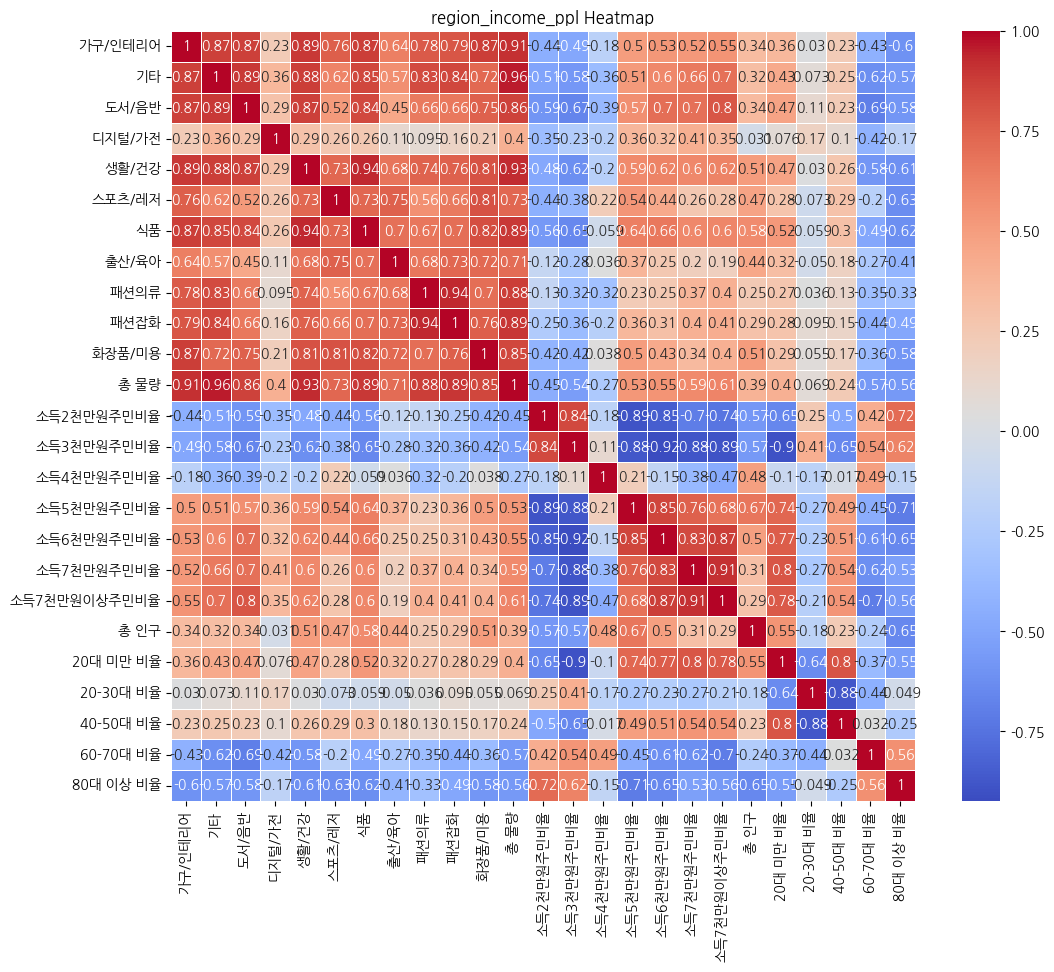

In [73]:
heatmap = region_income_ppl.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('region_income_ppl Heatmap')
plt.show()

## 결과 해석
소득5천만원을 기준으로 각 품목별 총 택배물량과의 상관관계가 뚜렷하게 나눠짐.

<양의 상관관계>
- 총 물량, 소득수준이 높아질수록 양의 상관관계가 점점 강해짐.
- 5천만원주민비율 ~ 7천만원이상주민비율 : 대부분의 품목에서 양의 상관관계
  - 가구/인테리어,기타, 도서음반, 생활건강, 식품
  - 소득7천만원이상 주민비율과 도서/음반과의 양의 관계가 가장 강함. (0.8)
- 다만, 품목 중에서 출산/육아는 높은 소득 수준 지역에서 상대적으로 약한 상관관계를 보임.

<음의 상관관계>
- 총 물량, 소득수준이 2천만원~4천만원 수준에서는 음의 상관관계. (3천만원 일 때 가장 강한 음의 상관관계를 보임)
- 품목 중에서는 도서/음반, 생활/건강, 식품에서 강한 음의 상관관계



---



총 인구, 총 물량 사이에 양의 상관관계
- 지역의 총 인구가 물량에 어느정도 영향을 미침.

- 20대 미만 비율이 높은 지역 : 총 물량, 품목 대체로 양의 상관관계.
- 40~50대 비율이 높은 지역 : 20대 만큼은 아니지만 약한 양의 상관관계
- 60~70, 80대이상 비율이 높은 지역 : 대체로 총물량에서는 강한 음의 상관관계.

## 가설검정 (유의미한 상관계수인지 판단하기 위함)

In [74]:
from scipy import stats
import pandas as pd

# 상관계수 행렬
correlation_matrix = region_income_ppl.corr()

# 유의수준 설정
alpha = 0.05  # 95% 신뢰수준

# 상관계수와 p-value를 저장할 데이터프레임 생성
correlation_results = pd.DataFrame(index=correlation_matrix.columns, columns=correlation_matrix.columns)

significant_correlations = []
insignificant_correlations = []

# 각 상관계수의 유의성 검정
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            r, p = stats.pearsonr(region_income_ppl[col1], region_income_ppl[col2])
            correlation_results.at[col1, col2] = (r, p)
            if p < alpha:
                print(f"{col1}:{col2} 유의미함.")
                significant_correlations.append((col1, col2))
            else:
                print(f"{col1}:{col2} 유의미하지 않음.")
                insignificant_correlations.append((col1, col2))

significant_df = pd.DataFrame(significant_correlations, columns=["Variable1", "Variable2"])
insignificant_df = pd.DataFrame(insignificant_correlations, columns=["Variable1", "Variable2"])

가구/인테리어:기타 유의미함.
가구/인테리어:도서/음반 유의미함.
가구/인테리어:디지털/가전 유의미하지 않음.
가구/인테리어:생활/건강 유의미함.
가구/인테리어:스포츠/레저 유의미함.
가구/인테리어:식품 유의미함.
가구/인테리어:출산/육아 유의미함.
가구/인테리어:패션의류 유의미함.
가구/인테리어:패션잡화 유의미함.
가구/인테리어:화장품/미용 유의미함.
가구/인테리어:총 물량 유의미함.
가구/인테리어:소득2천만원주민비율 유의미함.
가구/인테리어:소득3천만원주민비율 유의미함.
가구/인테리어:소득4천만원주민비율 유의미하지 않음.
가구/인테리어:소득5천만원주민비율 유의미함.
가구/인테리어:소득6천만원주민비율 유의미함.
가구/인테리어:소득7천만원주민비율 유의미함.
가구/인테리어:소득7천만원이상주민비율 유의미함.
가구/인테리어:총 인구 유의미하지 않음.
가구/인테리어:20대 미만 비율 유의미하지 않음.
가구/인테리어:20-30대 비율 유의미하지 않음.
가구/인테리어:40-50대 비율 유의미하지 않음.
가구/인테리어:60-70대 비율 유의미함.
가구/인테리어:80대 이상 비율 유의미함.
기타:가구/인테리어 유의미함.
기타:도서/음반 유의미함.
기타:디지털/가전 유의미하지 않음.
기타:생활/건강 유의미함.
기타:스포츠/레저 유의미함.
기타:식품 유의미함.
기타:출산/육아 유의미함.
기타:패션의류 유의미함.
기타:패션잡화 유의미함.
기타:화장품/미용 유의미함.
기타:총 물량 유의미함.
기타:소득2천만원주민비율 유의미함.
기타:소득3천만원주민비율 유의미함.
기타:소득4천만원주민비율 유의미하지 않음.
기타:소득5천만원주민비율 유의미함.
기타:소득6천만원주민비율 유의미함.
기타:소득7천만원주민비율 유의미함.
기타:소득7천만원이상주민비율 유의미함.
기타:총 인구 유의미하지 않음.
기타:20대 미만 비율 유의미함.
기타:20-30대 비율 유의미하지 않음.
기타:40-50대 비율 유의미하지 않음.
기타:60-70대 비율 유의미함.
기타:80대 이상 비율 유의미함.
도서/음반:가구/인테

In [77]:
significant_df

,Variable1,Variable2
0,가구/인테리어,기타
1,가구/인테리어,도서/음반
2,가구/인테리어,생활/건강
3,가구/인테리어,스포츠/레저
4,가구/인테리어,식품
5,가구/인테리어,출산/육아
6,가구/인테리어,패션의류
7,가구/인테리어,패션잡화
8,가구/인테리어,화장품/미용
9,가구/인테리어,총 물량


# 변수간 산점도 시각화 (소득수준 중심으로)

## 택배 총 물량과 고소득 수준의 산점도
- 고소득 수준 지역과 총 물량 사이에는 '양의 상관관계'
- 고소득의 비율이 높은 수준 지역에서는 상대적으로 많은 택배 물량이 발생하는 경향이 있음.

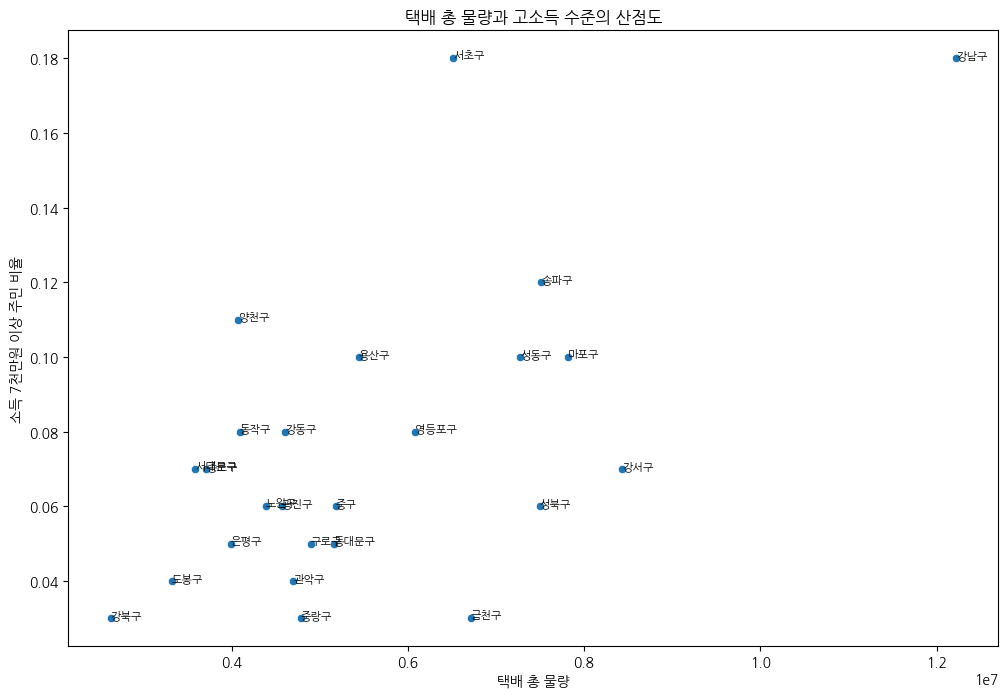

In [85]:
# 택배 총 물량, 소득 수준, 지역 이름 선택
data = region_income_ppl[['총 물량', '소득7천만원이상주민비율', '담당지역']]

# 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='총 물량', y='소득7천만원이상주민비율', data=data)

# 각 데이터 포인트에 지역 이름 주석 추가
for i in range(data.shape[0]):
    plt.annotate(data['담당지역'].iloc[i], (data['총 물량'].iloc[i], data['소득7천만원이상주민비율'].iloc[i]), fontsize=8)

plt.title('택배 총 물량과 고소득 수준의 산점도')
plt.xlabel('택배 총 물량')
plt.ylabel('소득 7천만원 이상 주민 비율')
plt.show()

## 택배 총 물량과 저소득 수준의 산점도
- 저소득 수준 지역과 총 물량 사이에는 '음의 상관관계'
- 저소득의 비율이 높은 지역에서는 상대적으로 적은 택배 물량이 발생하는 경향이 있음.

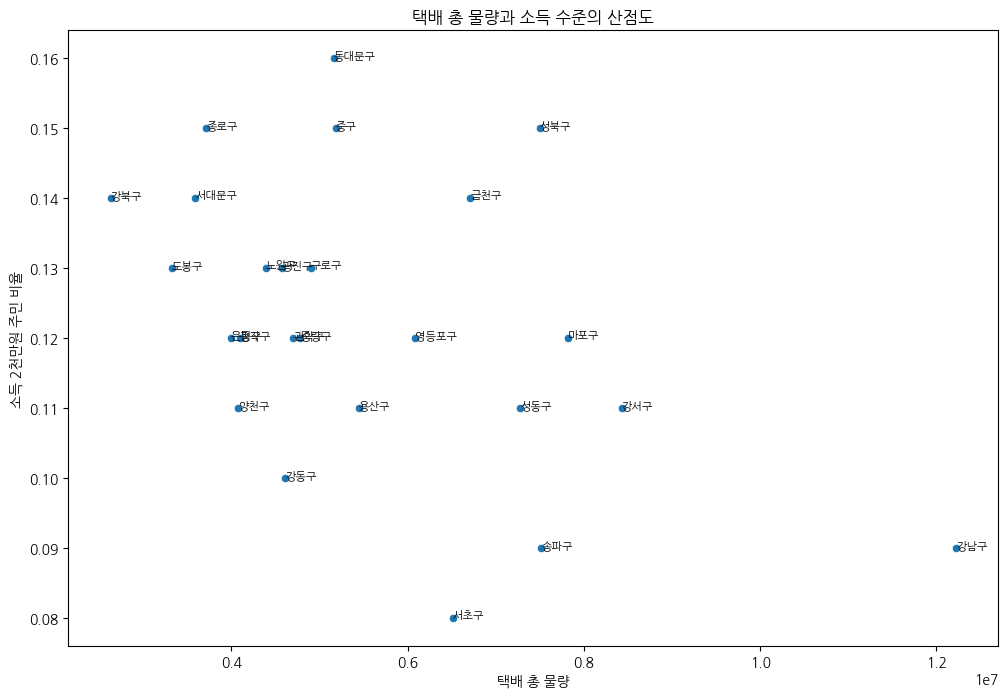

In [84]:
# 택배 총 물량, 소득 수준, 지역 이름 선택
data = region_income_ppl[['총 물량', '소득2천만원주민비율', '담당지역']]

# 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='총 물량', y='소득2천만원주민비율', data=data)

# 각 데이터 포인트에 지역 이름 주석 추가
for i in range(data.shape[0]):
    plt.annotate(data['담당지역'].iloc[i], (data['총 물량'].iloc[i], data['소득2천만원주민비율'].iloc[i]), fontsize=8)

plt.title('택배 총 물량과 저소득 수준의 산점도')
plt.xlabel('택배 총 물량')
plt.ylabel('소득 2천만원 주민 비율')
plt.show()

## 도서/음반 품목과 소득 수준의 산점도
- 이전 히트맵에서 상대적으로 고소득 비율이 높은 지역에서 도서/음반과의 '양의 상관관계'가 강하게 나옴.
- 소득 5천만원주민비율을 기점으로 음에서 양의 상관관계를 바뀜.

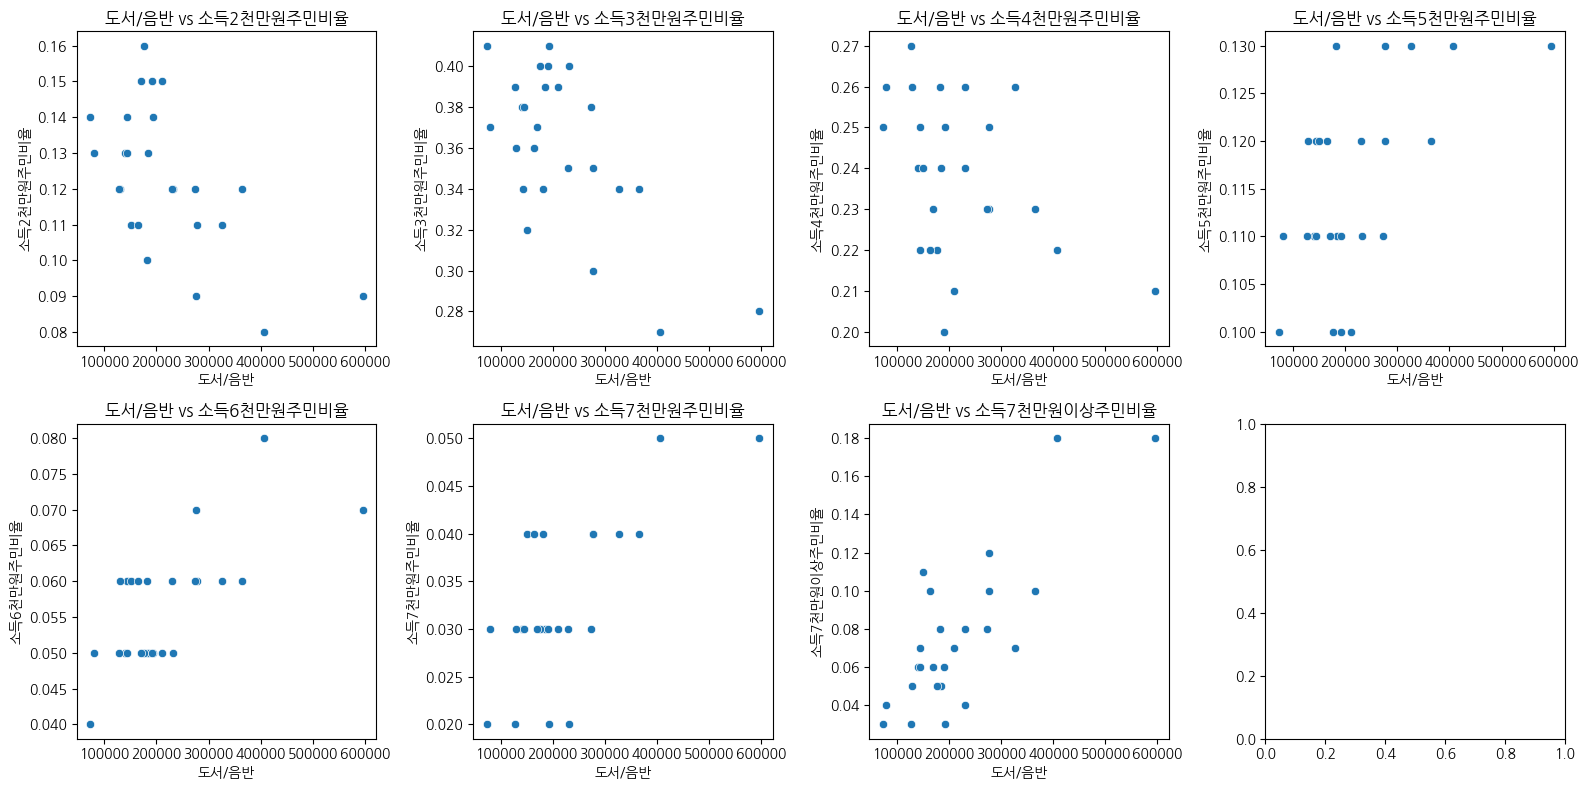

In [87]:
# 선택할 품목
selected_item = '도서/음반'

# 선택할 소득 수준 변수
income_levels = ['소득2천만원주민비율', '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율', '소득6천만원주민비율', '소득7천만원주민비율', '소득7천만원이상주민비율']

# 서브플롯 생성
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# 소득 수준별로 산점도 그리기
for i, income_level in enumerate(income_levels):
    row, col = divmod(i, 4)  # 서브플롯 위치 계산
    ax = axes[row, col]

    sns.scatterplot(x=selected_item, y=income_level, data=region_income_ppl, ax=ax)
    ax.set_title(f'{selected_item} vs {income_level}')
    ax.set_xlabel(selected_item)
    ax.set_ylabel(income_level)

# 서브플롯트 간의 간격 조정
plt.tight_layout()
plt.show()

## 가구/인테리어 품목과 소득 수준의 산점도
- 소득 5천만원주민비율을 기점으로 관계없음에서 양의 상관관계를 바뀜.

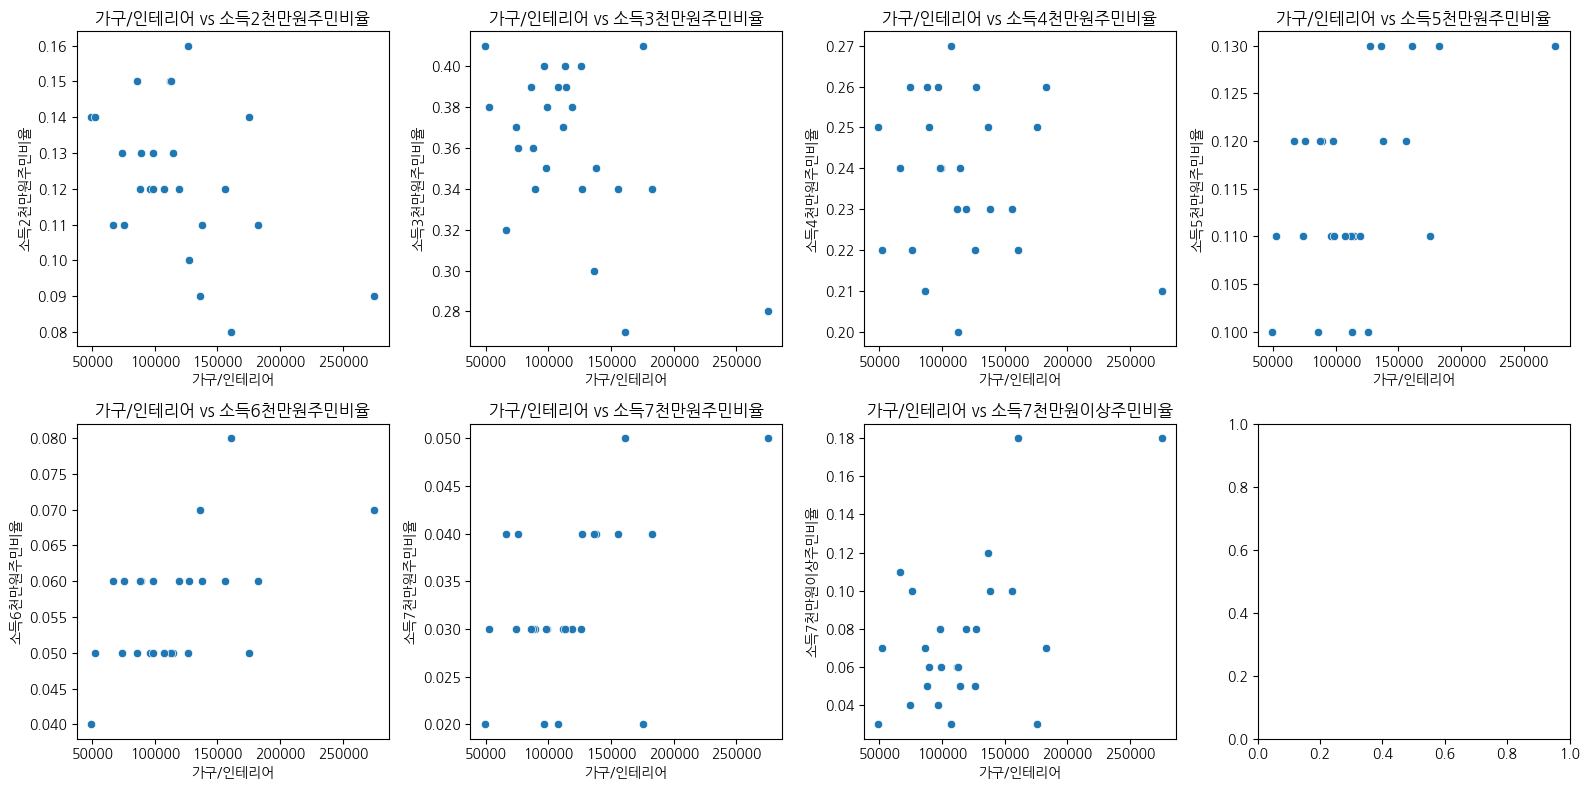

In [88]:
# 선택할 품목
selected_item = '가구/인테리어'

# 선택할 소득 수준 변수
income_levels = ['소득2천만원주민비율', '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율', '소득6천만원주민비율', '소득7천만원주민비율', '소득7천만원이상주민비율']

# 서브플롯 생성
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# 소득 수준별로 산점도 그리기
for i, income_level in enumerate(income_levels):
    row, col = divmod(i, 4)  # 서브플롯 위치 계산
    ax = axes[row, col]

    sns.scatterplot(x=selected_item, y=income_level, data=region_income_ppl, ax=ax)
    ax.set_title(f'{selected_item} vs {income_level}')
    ax.set_xlabel(selected_item)
    ax.set_ylabel(income_level)

# 서브플롯트 간의 간격 조정
plt.tight_layout()
plt.show()

## 생활/건강 품목과 소득 수준의 산점도
- 소득 5천만원주민비율을 기점으로 관계 없음에서 양의 상관관계를 바뀜.

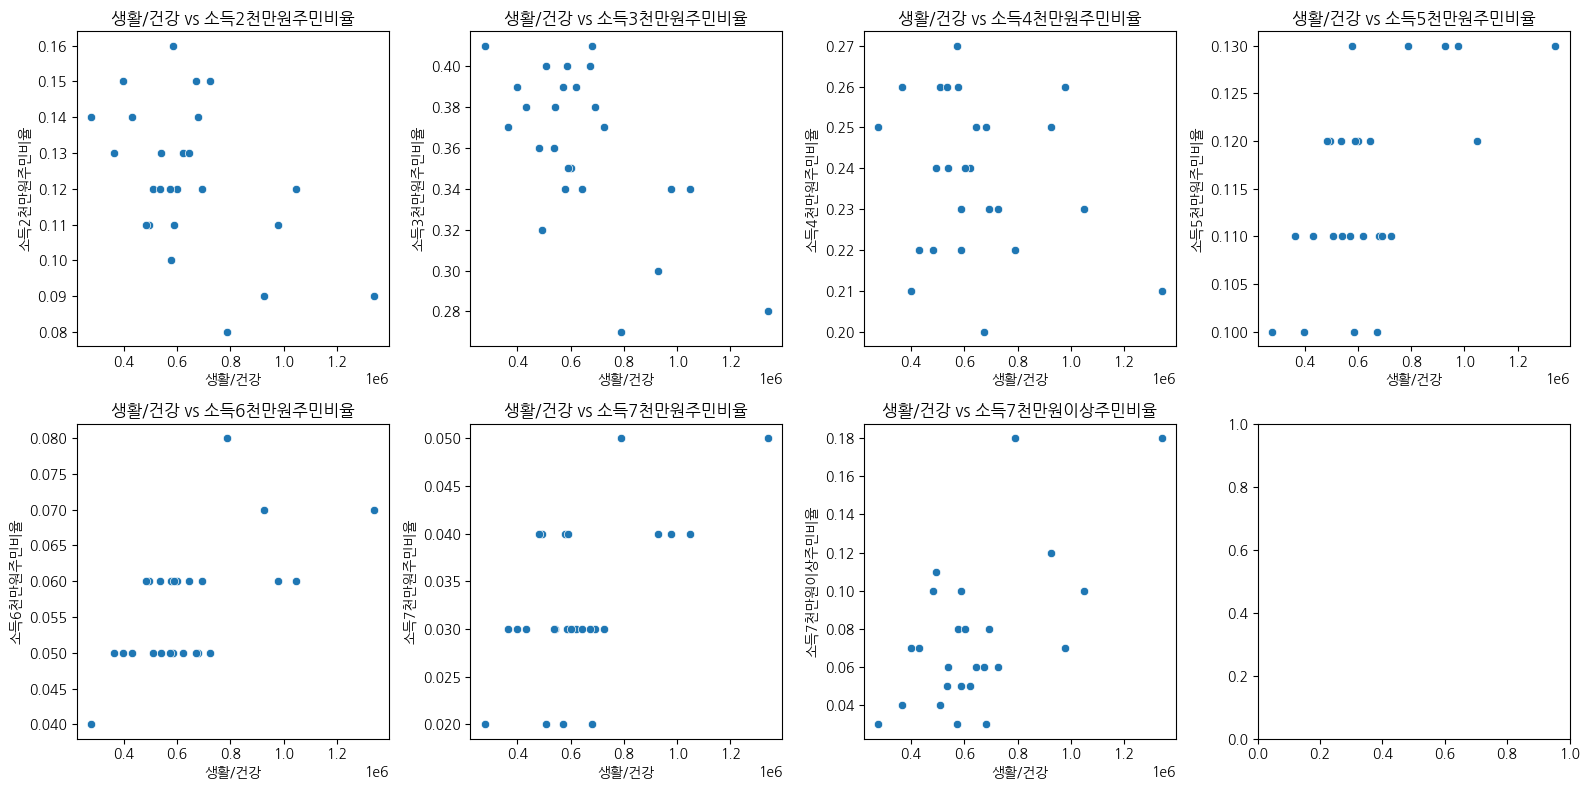

In [89]:
# 선택할 품목
selected_item = '생활/건강'

# 선택할 소득 수준 변수
income_levels = ['소득2천만원주민비율', '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율', '소득6천만원주민비율', '소득7천만원주민비율', '소득7천만원이상주민비율']

# 서브플롯 생성
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# 소득 수준별로 산점도 그리기
for i, income_level in enumerate(income_levels):
    row, col = divmod(i, 4)  # 서브플롯 위치 계산
    ax = axes[row, col]

    sns.scatterplot(x=selected_item, y=income_level, data=region_income_ppl, ax=ax)
    ax.set_title(f'{selected_item} vs {income_level}')
    ax.set_xlabel(selected_item)
    ax.set_ylabel(income_level)

# 서브플롯트 간의 간격 조정
plt.tight_layout()
plt.show()

## 식품 품목과 소득 수준의 산점도
- 소득 5천만원주민비율을 기점으로 관계 없음에서 양의 상관관계를 바뀜.

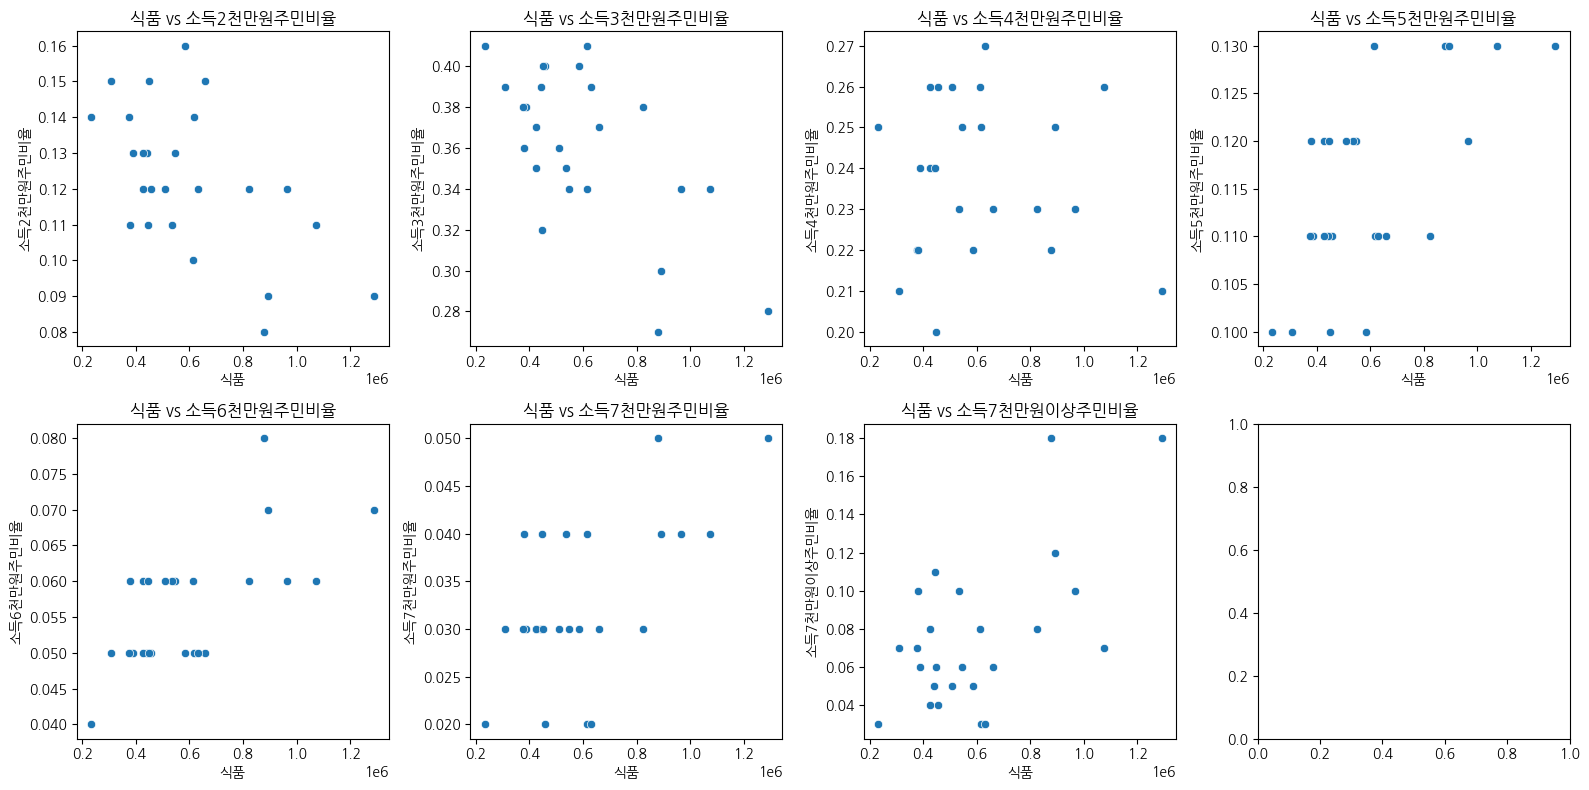

In [91]:
# 선택할 품목
selected_item = '식품'

# 선택할 소득 수준 변수
income_levels = ['소득2천만원주민비율', '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율', '소득6천만원주민비율', '소득7천만원주민비율', '소득7천만원이상주민비율']

# 서브플롯 생성
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# 소득 수준별로 산점도 그리기
for i, income_level in enumerate(income_levels):
    row, col = divmod(i, 4)  # 서브플롯 위치 계산
    ax = axes[row, col]

    sns.scatterplot(x=selected_item, y=income_level, data=region_income_ppl, ax=ax)
    ax.set_title(f'{selected_item} vs {income_level}')
    ax.set_xlabel(selected_item)
    ax.set_ylabel(income_level)

# 서브플롯트 간의 간격 조정
plt.tight_layout()
plt.show()

## 품목별 택배 총물량 - 소득수준 중심 산점도 모아보기

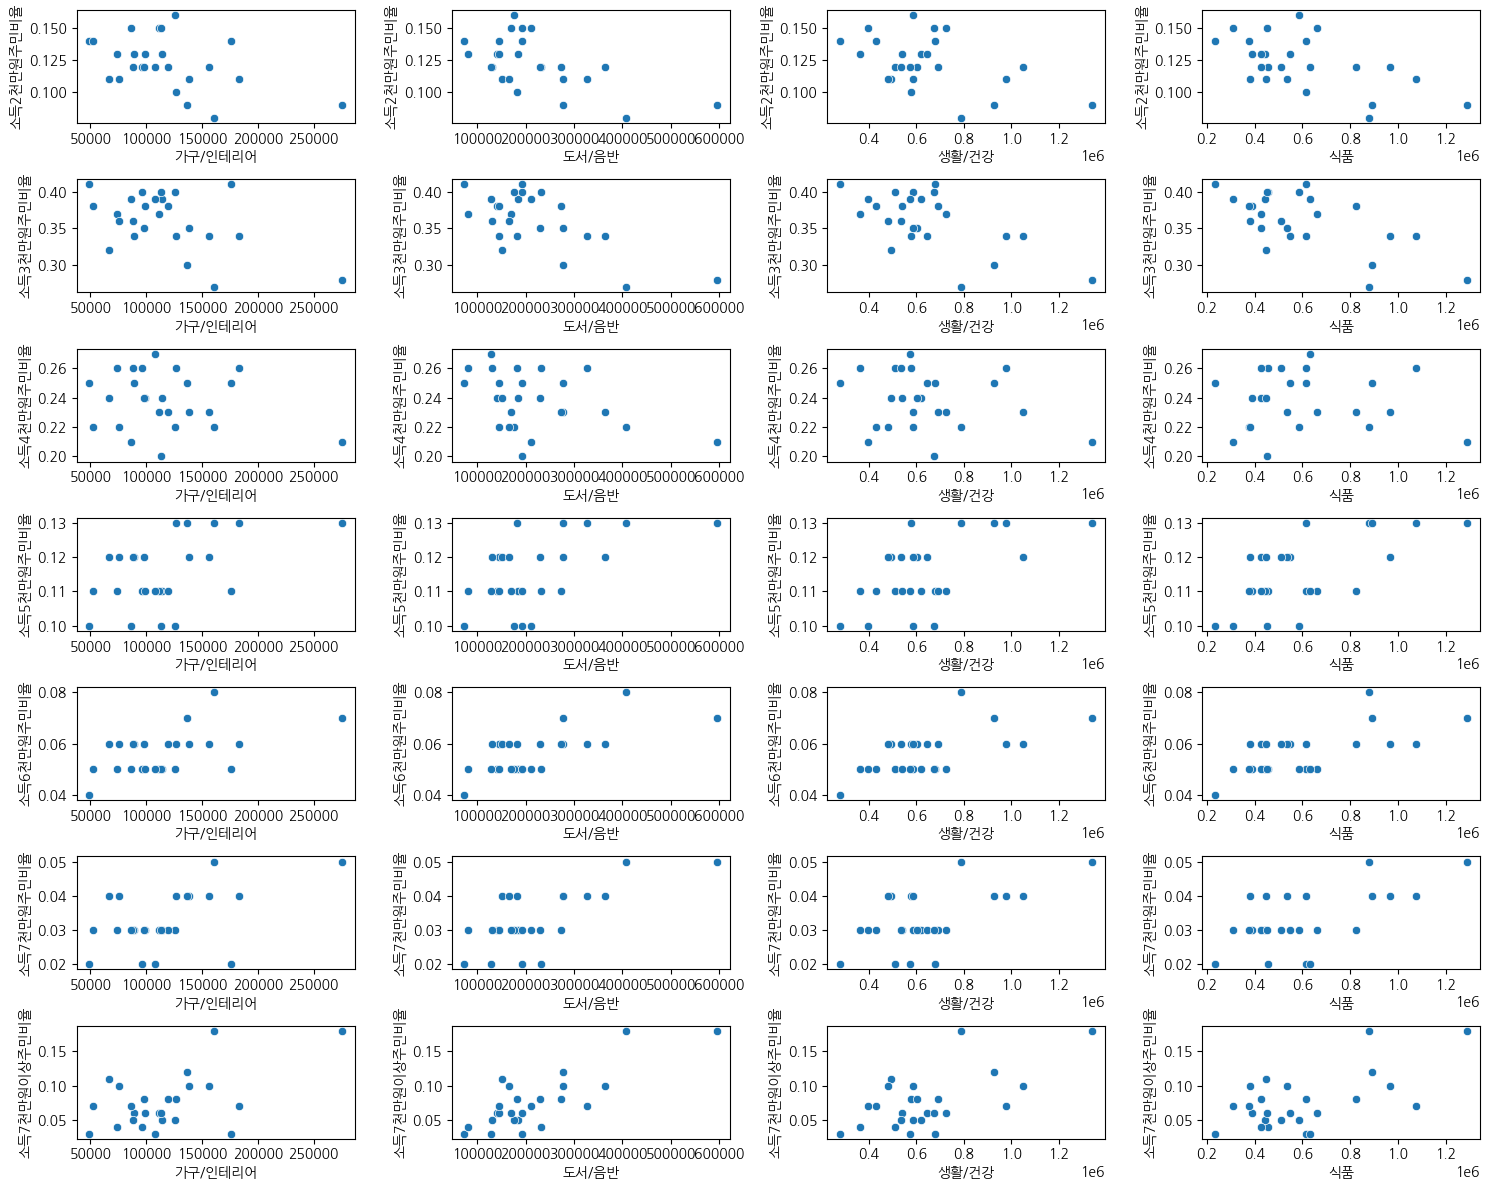

In [94]:
# 관심 있는 특성과 소득 수준별 컬럼 선택
features = ['가구/인테리어', '도서/음반', '생활/건강', '식품']
income_columns = ["소득2천만원주민비율", "소득3천만원주민비율", "소득4천만원주민비율", "소득5천만원주민비율", "소득6천만원주민비율", "소득7천만원주민비율", "소득7천만원이상주민비율"]

# 서브플롯을 사용한 산점도 그리기
fig, axes = plt.subplots(nrows=len(income_columns), ncols=len(features), figsize=(15, 12))
for i, income_column in enumerate(income_columns):
    for j, feature in enumerate(features):
        ax = axes[i, j]
        sns.scatterplot(x=feature, y=income_column, data=region_income_ppl, ax=ax)
        ax.set_xlabel(feature)
        ax.set_ylabel(income_column)

plt.tight_layout()
plt.show()

# 변수간 산점도 시각화 (인구 중심으로)

## 택배 총 물량과 총 인구의 산점도
- 총 인구와 총 물량 사이에는 양의 상관관계
- 한 지역의 인구가 많을 때 많은 택배 물량이 발생할 경향이 있음.

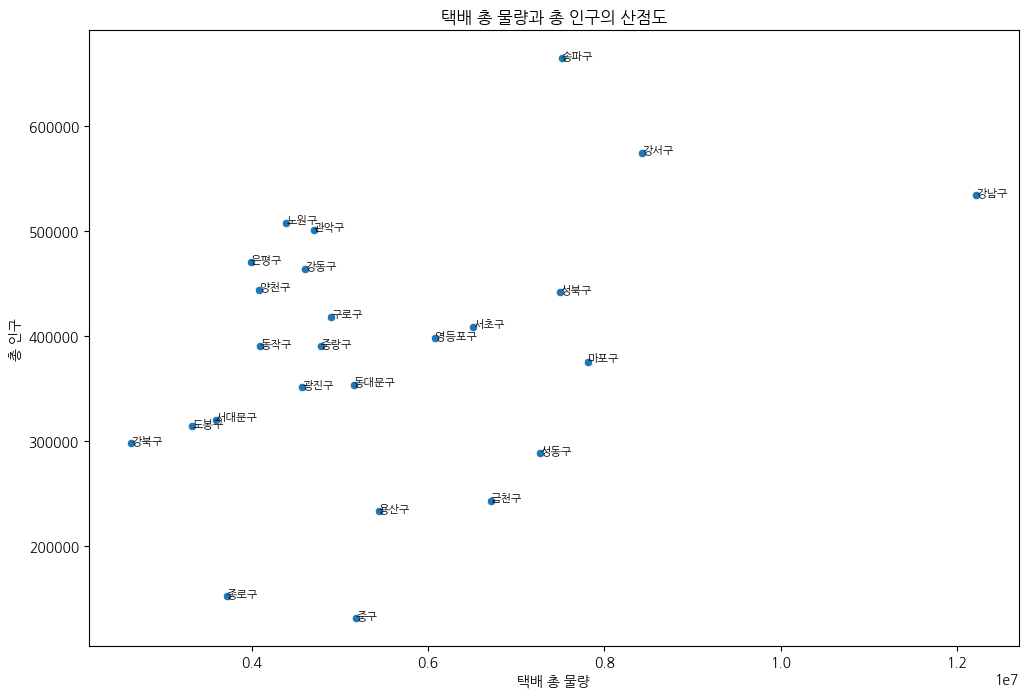

In [83]:
data = region_income_ppl[['총 물량', '총 인구', '담당지역']]

# 산점도 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(x='총 물량', y='총 인구', data=data)

# 각 데이터 포인트에 지역 이름 주석 추가
for i in range(data.shape[0]):
    plt.annotate(data['담당지역'].iloc[i], (data['총 물량'].iloc[i], data['총 인구'].iloc[i]), fontsize=8)

plt.title('택배 총 물량과 총 인구의 산점도')
plt.xlabel('택배 총 물량')
plt.ylabel('총 인구')
plt.show()

In [95]:
region_income_ppl.columns

Index(['담당지역', '터미널이름', '가구/인테리어', '기타', '도서/음반', '디지털/가전', '생활/건강', '스포츠/레저',
       '식품', '출산/육아', '패션의류', '패션잡화', '화장품/미용', '총 물량', '소득2천만원주민비율',
       '소득3천만원주민비율', '소득4천만원주민비율', '소득5천만원주민비율', '소득6천만원주민비율', '소득7천만원주민비율',
       '소득7천만원이상주민비율', '총 인구', '20대 미만 비율', '20-30대 비율', '40-50대 비율',
       '60-70대 비율', '80대 이상 비율'],
      dtype='object')

## 택배 총 물량과 연령대별 산점도
- 보통 20대 미만부터 40~50대 비율이 높은 지역과 총 물량은 양의 상관관계
- 60~70대, 80대 이상 비율이 높은 지역과 총 물량은 음의 상관관계를 가진다.
- 가설검정일 때 연령대와 관련된 변수로부터 생성된 상관관계가 유의미하지 않은 경우가 다소 있음.
- 소득수준만큼 확실하게 말할 수는 없지만, 고령화된 지역일수록 택배 총 물량이 적어진다고 판단.

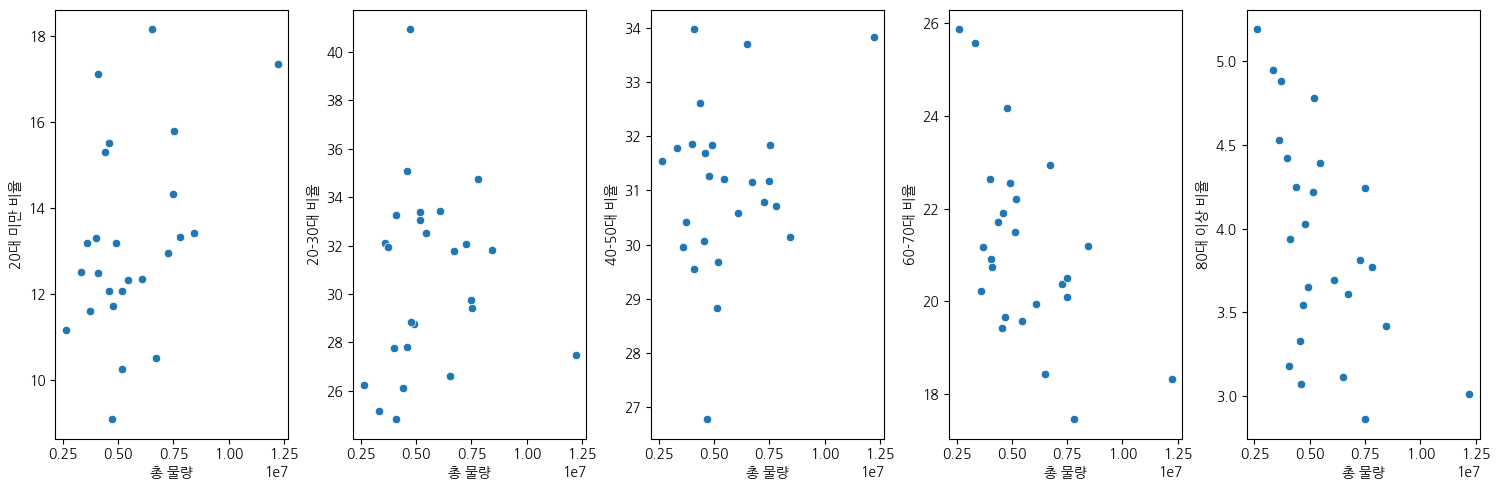

In [102]:
age_columns = ['20대 미만 비율', '20-30대 비율', '40-50대 비율', '60-70대 비율', '80대 이상 비율']

# 산점도 그리기
fig, axes = plt.subplots(nrows=1, ncols=len(age_columns), figsize=(15, 5))
for i, age_column in enumerate(age_columns):
    ax = axes[i]
    sns.scatterplot(x='총 물량', y=age_column, data=region_income_ppl, ax=ax)
    ax.set_xlabel('총 물량')
    ax.set_ylabel(age_column)

plt.tight_layout()
plt.show()

## 품목별 택배 총 물량 - 연령대 중심 산점도 모아보기

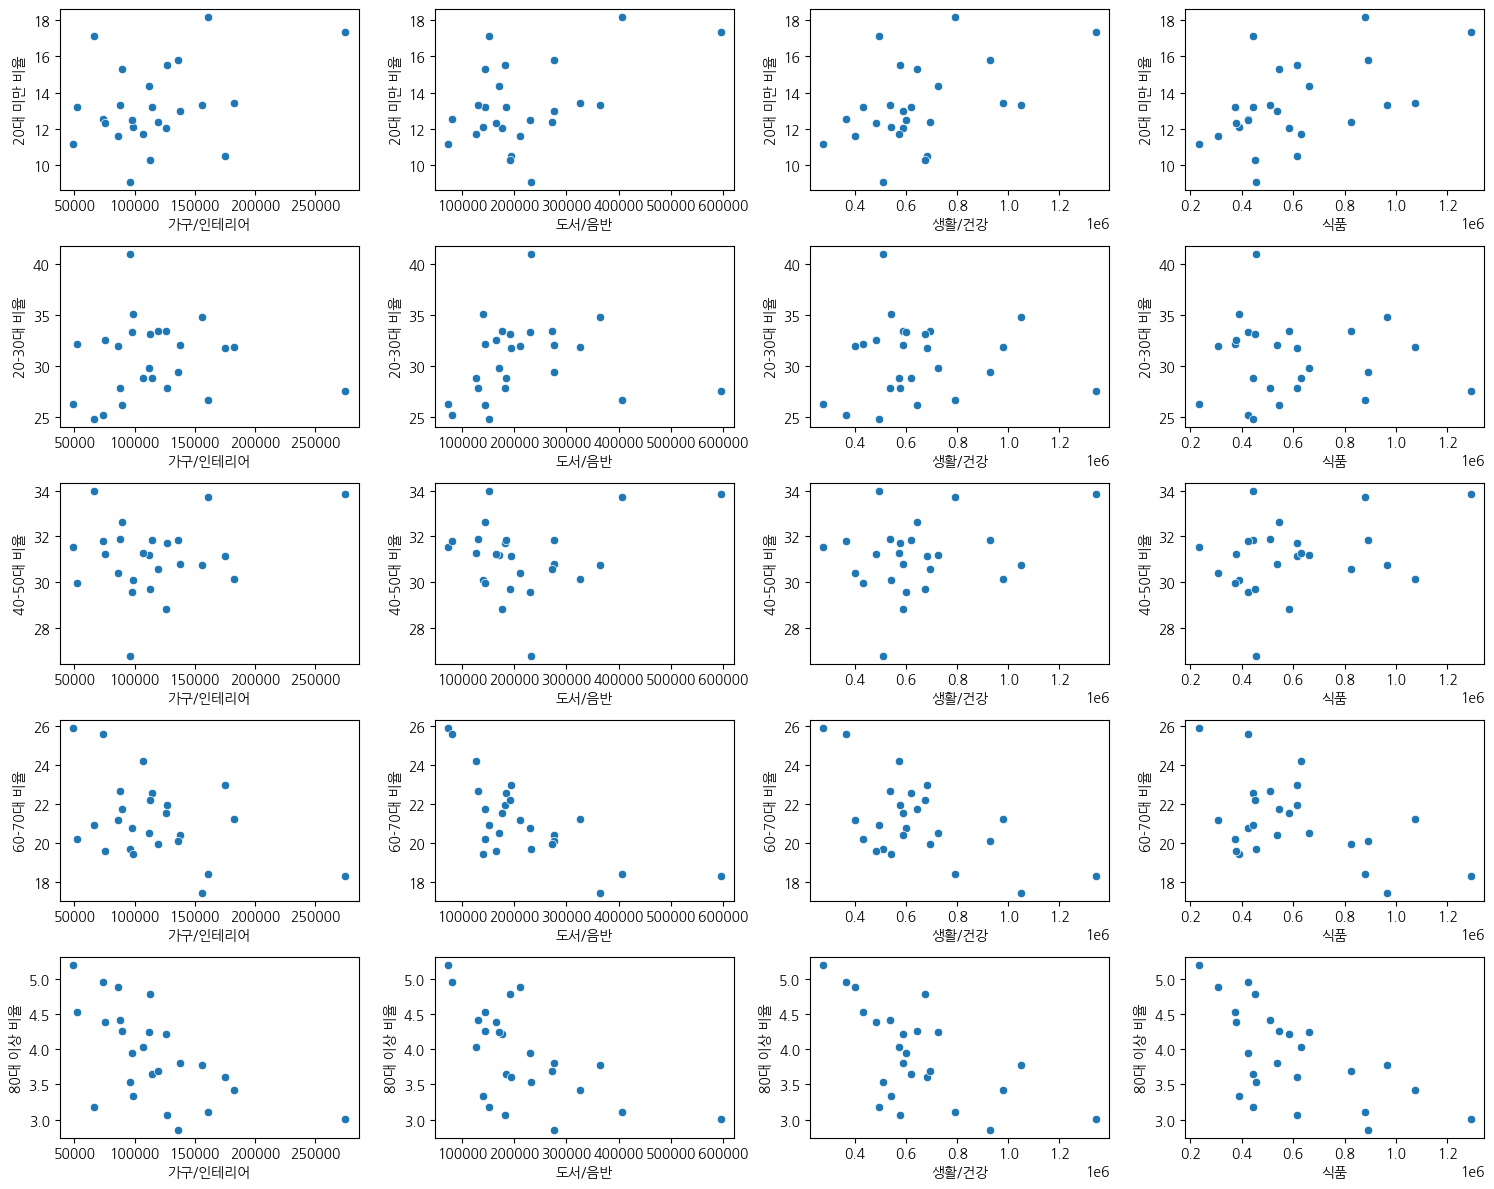

In [96]:
# 관심 있는 특성과 소득 수준별 컬럼 선택
features = ['가구/인테리어', '도서/음반', '생활/건강', '식품']
age_columns = ['20대 미만 비율', '20-30대 비율', '40-50대 비율', '60-70대 비율', '80대 이상 비율']

# 서브플롯을 사용한 산점도 그리기
fig, axes = plt.subplots(nrows=len(age_columns), ncols=len(features), figsize=(15, 12))
for i, age_columns in enumerate(age_columns):
    for j, feature in enumerate(features):
        ax = axes[i, j]
        sns.scatterplot(x=feature, y=age_columns, data=region_income_ppl, ax=ax)
        ax.set_xlabel(feature)
        ax.set_ylabel(age_columns)

plt.tight_layout()
plt.show()